<a href="https://colab.research.google.com/github/nak650228/YOLOv4/blob/main/ssocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSOCRを使った7セグメントディスプレイの数字認識

In [1]:
from IPython.display import clear_output
import os

In [2]:
#@title ヘルパー関数の定義

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      os.rename(name,'image.jpg')
      print ('saved file', name)


# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [3]:
#ssocrをGithubからクローンする
! git clone https://github.com/auerswal/ssocr.git
clear_output()

In [4]:
#ssocrのインストール
% cd /content/ssocr/
!apt-get install libimlib2-dev
!make clean
!make install
clear_output()

In [23]:
#@title ##**画像ファイルのダウンロード**
#@markdown **認識したい画像ファイルを指定します。**
%cd /content
upload()

/content


Saving test.png to test.png
saved file test.png


In [24]:
#@title ##**パラメータの指定**

#@markdown **認識の精度を閾値で指定します(%)。**
Threshold = 18  #@param {type: "slider", min: 0, max: 100}
#Threshold = Threshold / 100

#print (ImageFileName)

In [25]:
TmpFile = "/content/temp.png"
ImageFileName = "/content/image.jpg"
!/usr/local/bin/ssocr -P -d-1 {ImageFileName} -D{TmpFile} -t {Threshold}

thresh = 18.000000 (default: 50.000000)
thresh = 18.000000 (default: 50.000000)
flags & VERBOSE=4
thresh=18.000000
flags & PRINT_INFO=0
flags & ADJUST_GRAY=0
flags & ABSOLUTE_THRESHOLD=0
flags & DO_ITERATIVE_THRESHOLD=0
flags & USE_DEBUG_IMAGE=8
flags & DEBUG_OUTPUT=0
flags & PROCESS_ONLY=0
flags & ASCII_ART_SEGMENTS=0
flags & PRINT_AS_HEX=0
flags & OMIT_DECIMAL=0
flags & PRINT_SPACES=0
flags & SPC_USE_AVG_DST=0
need_pixels = 1
ignore_pixels = 0
number_of_digits = -1
foreground = 0 (black)
background = 255 (white)
luminance  = Rec709
charset    = full
height/width threshold for one   = 3
width/height threshold for minus = 2
max_dig_h/h threshold for decimal = 5
max_dig_w/w threshold for decimal = 2
distance factor for adding spaces = 1.40
optind=6 argc=7
argv[argc-1]=/content/image.jpg used as image file name
loading image /content/image.jpg
image width: 1200
image height: 900
3.00 <= lum <= 255.00 (lum should be in [0,255])
adjusting threshold to image: 18.000000 -> 18.964706
using th

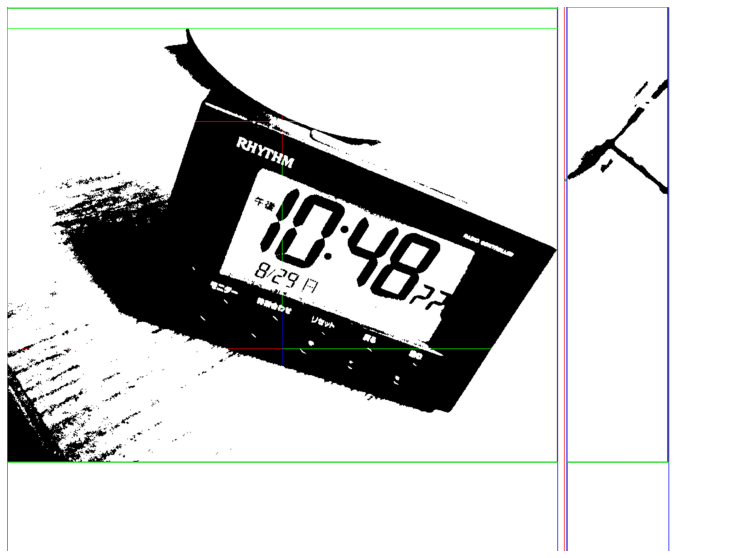

In [26]:
imShow(TmpFile)